In [1]:
import scanpy as sc
import scanpy.external as sce
import pandas as pd
import scConnect as cn
import numpy as np
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#sc.logging.print_versions()

In [2]:
df = pd.read_csv("../data/GSE72056_melanoma_single_cell_revised_v2.txt.gz", sep="\t", index_col=0)

In [3]:
x = df[3:]
meta = df[:3]
print(x.values.shape)
print(meta.shape)

(23686, 4645)
(3, 4645)


In [4]:
adata_h = sc.AnnData(X=x.T.values)

In [5]:
adata_h.var_names = x.index
adata_h.obs_names = x.columns
adata_h.obs_names_make_unique()
adata_h.var_names_make_unique()
adata_h.obs = meta.T

In [6]:
cell_map={
    "0": "Malignant",
    "1": "T-cells",
    "2": "B-cells",
    "3": "Macrophages",
    "4": "Endothelial cells",
    "5": "CAF",
    "6": "NK"
}
adata_h.obs["annotated"] = [cell_map[str(int(cell_type))] for cell_type in adata_h.obs['non-malignant cell type (1=T,2=B,3=Macro.4=Endo.,5=CAF;6=NK)']]

In [7]:
adata_h.obs["tumor"]=[str(int(group)) for group in adata_h.obs["tumor"]]

... storing 'tumor' as categorical
... storing 'annotated' as categorical


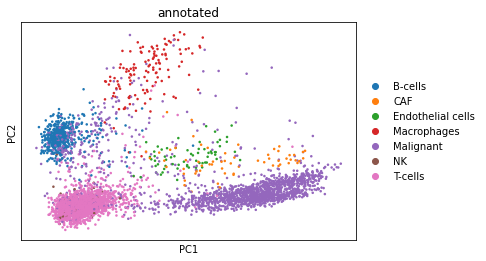

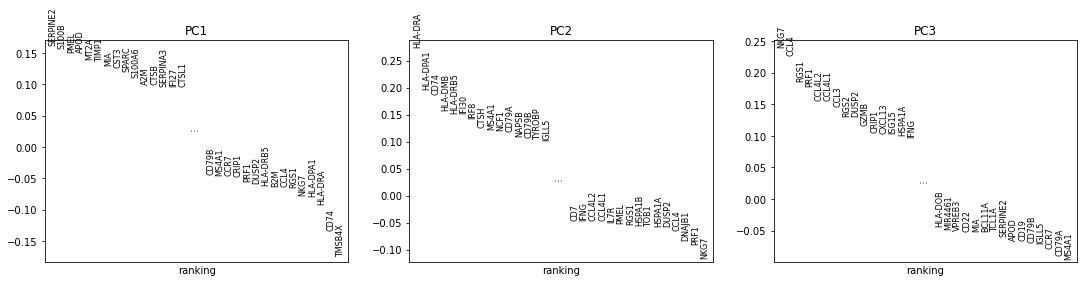

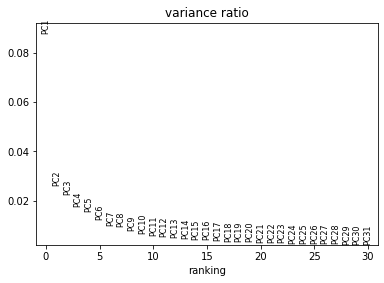

In [8]:
sc.pp.highly_variable_genes(adata_h, n_top_genes=6000)
sc.pp.pca(adata_h, use_highly_variable=True)
sc.pl.pca_overview(adata_h, color=["annotated"])

In [9]:
sc.pp.neighbors(adata_h, n_pcs=6, n_neighbors=25)
#sce.pp.bbknn(adata_h, batch_key="phase", n_pcs=6)
sc.tl.umap(adata_h)

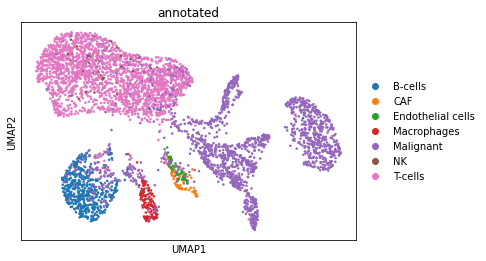

In [10]:
sc.pl.umap(adata_h, color=["annotated"])

In [98]:
adata_h = cn.genecall.meanExpression(adata_h, groupby="annotated")
adata_h = cn.connect.ligands(adata_h, organism="hsapiens")
adata_h = cn.connect.receptors(adata_h, organism="hsapiens")

c:\users\jetja\anaconda3\envs\connect\lib\site-packages\scipy\stats\stats.py:402: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


In [99]:
adata, ligand_values, receptor_values = cn.connect.specificity(adata_h, n=5, organism="hsapiens", groupby= "annotated", return_values=True)

Shuffeling dataframe 5 out of 5 |██████████████████████████████| 100.0% 
Calculating means...
Calculating standard deviations...
Calculating Z-score, p-values and corrected p-values...
20.153684945860988 % of group metrices were 0. increase n to reduce this number
10.243277848911651 % of group metrices were 0. increase n to reduce this number


In [100]:
std_ligands = cn.connect._std_df(ligand_values)
mean_ligands = cn.connect._mean_df(ligand_values)

In [101]:
mean_ligands

,B-cells,CAF,Endothelial cells,Macrophages,Malignant,NK,T-cells
4-1BB ligand,3.174999,4.643816,6.819323,3.675640,3.634880,2.648419,3.694488
5-LOX activating protein,208.401648,202.644110,228.672241,195.487381,206.487952,300.880055,195.895868
ACTH,2.610657,5.657990,2.585295,2.163083,3.796632,3.205609,2.983551
ADP-ribosylation factor 1,368.623877,407.220282,367.287415,394.689374,370.659973,346.645825,382.411670
APRIL,7.598622,2.208430,6.318300,10.439597,7.879506,17.593312,7.725556
...,...,...,...,...,...,...,...
dopamine,0.000000,0.014508,0.000000,0.000000,0.000000,0.000000,0.000000
(-)-noradrenaline,0.027922,0.010714,0.000000,0.006581,0.053217,0.000000,0.054564
(-)-adrenaline,0.000000,0.000000,0.000000,0.000000,0.240213,0.000000,0.196660
5-hydroxytryptamine,0.101969,0.066521,0.000000,0.051129,0.468087,0.075611,0.339832


In [102]:
std_ligands

,B-cells,CAF,Endothelial cells,Macrophages,Malignant,NK,T-cells
4-1BB ligand,0.674108,5.031840,3.630199,3.023199,0.356995,2.053818,0.449837
5-LOX activating protein,29.382284,74.092095,43.682406,40.662178,13.959982,187.261769,11.691395
ACTH,0.785392,4.322960,1.634565,0.846052,0.386124,2.058411,0.401282
ADP-ribosylation factor 1,11.908536,53.151534,37.457430,31.275013,8.735801,89.331933,6.787632
APRIL,1.569279,2.906660,4.551317,4.893797,0.435292,20.316184,0.316254
...,...,...,...,...,...,...,...
dopamine,0.000000,0.029017,0.000000,0.000000,0.000000,0.000000,0.000000
(-)-noradrenaline,0.055844,0.021429,0.000000,0.013163,0.072790,0.000000,0.067027
(-)-adrenaline,0.000000,0.000000,0.000000,0.000000,0.140392,0.000000,0.119051
5-hydroxytryptamine,0.096458,0.133041,0.000000,0.102259,0.093554,0.151222,0.089394


In [97]:
from importlib import reload
cn.genecall = reload(cn.genecall)
cn.connect = reload(cn.connect)

In [37]:
random_keep = np.random.choice(adata_h.obs_names, size=int(len(adata_h.obs_names)*0.8))

In [38]:
adata_h[random_keep]

View of AnnData object with n_obs × n_vars = 3716 × 23686
    obs: 'tumor', 'malignant(1=no,2=yes,0=unresolved)', 'non-malignant cell type (1=T,2=B,3=Macro.4=Endo.,5=CAF;6=NK)', 'annotated'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'annotated_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [64]:
def gene_call(adata, groupby, organism, transformation, p):
    import pandas as pd
    random_keep = np.random.choice(adata.obs_names, size=int(len(adata.obs_names)*p))
    adata = cn.genecall.meanExpression(adata[random_keep], groupby=groupby, normalization=False, use_raw=False, transformation=transformation)
    gene_call = pd.DataFrame(adata.uns["gene_call"])
    return gene_call

In [68]:
dfs = list()
for i in range(3):
    print(i)
    g = gene_call(adata_h, groupby="annotated", organism="hsapiens", transformation=None, p = 0.8)
    dfs.append(g)

0


Trying to set attribute `.uns` of view, copying.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


1


Trying to set attribute `.uns` of view, copying.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


2


Trying to set attribute `.uns` of view, copying.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [69]:
def _values_df(dfs):
    values_df = dfs[0].copy()
    
    for i in range(values_df.shape[0]):
        for j in range(values_df.shape[1]):
            values = list()
            for df in range(len(dfs)):
                values.append(dfs[df].iloc[i,j])
            values_df.iloc[i,j] = str(values)
    return values_df

In [74]:
values_df = dfs[0].copy()


AttributeError: 'DataFrame' object has no attribute 'multiindex'

In [13]:
adata_h = cn.connect.significance(adata_h, groupby="annotated", n=5, organism="hsapiens")

shuffeling 1 out of 5 times
shuffeling 2 out of 5 times
shuffeling 3 out of 5 times
shuffeling 4 out of 5 times
shuffeling 5 out of 5 times
19.629758994062172 % of group metrices were 0. increase n to reduce this number
6.628649412682167 % of group metrices were 0. increase n to reduce this number


In [35]:
adata_h = cn.connect.significance(adata_h, groupby="annotated", n=10, organism="hsapiens")

shuffeling 1 out of 10 times
shuffeling 2 out of 10 times
shuffeling 3 out of 10 times
shuffeling 4 out of 10 times
shuffeling 5 out of 10 times
shuffeling 6 out of 10 times
shuffeling 7 out of 10 times
shuffeling 8 out of 10 times
shuffeling 9 out of 10 times
shuffeling 10 out of 10 times
14.844568634299685 % of group metrices were 0. increase n to reduce this number
4.956865038748355 % of group metrices were 0. increase n to reduce this number


In [200]:
adata_h = cn.connect.significance(adata_h, groupby="annotated", n=40, organism="hsapiens")

shuffeling 1 out of 40 times


c:\users\jonja158\anaconda3\envs\connect\lib\site-packages\scipy\stats\stats.py:402: RuntimeWarning:

divide by zero encountered in log



shuffeling 2 out of 40 times
shuffeling 3 out of 40 times
shuffeling 4 out of 40 times
shuffeling 5 out of 40 times
shuffeling 6 out of 40 times
shuffeling 7 out of 40 times
shuffeling 8 out of 40 times
shuffeling 9 out of 40 times
shuffeling 10 out of 40 times
shuffeling 11 out of 40 times
shuffeling 12 out of 40 times
shuffeling 13 out of 40 times
shuffeling 14 out of 40 times
shuffeling 15 out of 40 times
shuffeling 16 out of 40 times
shuffeling 17 out of 40 times
shuffeling 18 out of 40 times
shuffeling 19 out of 40 times
shuffeling 20 out of 40 times
shuffeling 21 out of 40 times
shuffeling 22 out of 40 times
shuffeling 23 out of 40 times
shuffeling 24 out of 40 times
shuffeling 25 out of 40 times
shuffeling 26 out of 40 times
shuffeling 27 out of 40 times
shuffeling 28 out of 40 times
shuffeling 29 out of 40 times
shuffeling 30 out of 40 times
shuffeling 31 out of 40 times
shuffeling 32 out of 40 times
shuffeling 33 out of 40 times
shuffeling 34 out of 40 times
shuffeling 35 out 

In [201]:
adata_h

AnnData object with n_obs × n_vars = 4645 × 23686
    obs: 'tumor', 'malignant(1=no,2=yes,0=unresolved)', 'non-malignant cell type (1=T,2=B,3=Macro.4=Endo.,5=CAF;6=NK)', 'annotated'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'annotated_colors', 'neighbors', 'umap', 'gene_call', 'ligands', 'receptors', 'ligands_zscore', 'receptors_zscore', 'ligands_corr_pval', 'receptors_corr_pval'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [202]:
edges = cn.connect.interactions(adata_h, adata_h, organism="hsapiens")

finding connections between 7 emitter clusters and 7 target clusters |██████████████████████████████| 100.0% 


In [203]:
nodes = cn.connect.nodes(adata_h)


precessing adata #1
processing cluster B-cells
processing cluster CAF
processing cluster Endothelial cells
processing cluster Macrophages
processing cluster Malignant
processing cluster NK
processing cluster T-cells


In [204]:
G = cn.graph.build_graph(edges, nodes)

Graph has 13945 interactions between 7 clusters
B-cells has 4668 interactions
CAF has 3365 interactions
Endothelial cells has 2839 interactions
Macrophages has 3606 interactions
Malignant has 5562 interactions
NK has 2280 interactions
T-cells has 5570 interactions


In [206]:
cn.app = reload(cn.app)

cn.app.graph(G, mode="external", debug=True)

Dash app running on http://localhost:8888/proxy/8050/


In [188]:
df = pd.DataFrame({"Hi": ["one", "Two", "tree", "for", "five"], "bu": [1,2,3,4,5]})
df = df.set_index("Hi")
df.sort_values()

,bu
Hi,
one,1
Two,2
tree,3
for,4
five,5


In [30]:
import plotly.express as px
from sklearn.preprocessing import minmax_scale
G_flat = cn.graph.flatten_graph(G)
edge = G_flat.edges['CAF', 'B-cells']
interactions = pd.DataFrame(edge["interactions"])[
            ["interaction", "receptorfamily", "score", "log_score", "weighted_score", "ligand_zscore",
             "ligand_pval", "receptor_zscore", "receptor_pval", "pubmedid"]]
# Scale p values to a minimum of 10E-30, as 0 is invalid
def scale_pval(pvals, min=10E-230, max=0.999999999):
    for i, pval in enumerate(pvals):
        if pval == 0:
            pval= min
        if pval == 1:
            pval = max
        pvals[i] = pval

    return pvals

interactions["ligand_pval"] = scale_pval(interactions["ligand_pval"])
interactions["receptor_pval"] = scale_pval(interactions["receptor_pval"])
interactions["Significance"] = [np.sqrt((-np.log10(r))*(-np.log10(l))) for r, l in zip(interactions["receptor_pval"], interactions["ligand_pval"])]
px.scatter(interactions, 
           x="ligand_zscore", 
           y="receptor_zscore", 
           color="Significance",
           size="log_score",
           hover_name="interaction",
           hover_data=["receptorfamily", "pubmedid", "ligand_pval", "receptor_pval"],
           color_continuous_scale=px.colors.sequential.Viridis_r
          )

<ipython-input-30-2da635831a85>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
np.sqrt()

-0.0

In [57]:
val = 1.1+10E-10
np.sqrt(-np.log10(1)*-np.log10(0))

<ipython-input-57-c94dc9620c15>:2: RuntimeWarning:

divide by zero encountered in log10

<ipython-input-57-c94dc9620c15>:2: RuntimeWarning:

invalid value encountered in double_scalars



nan

In [102]:
interactions.receptorfamily

0           Tumour necrosis factor (TNF) receptor family
1                                          Lipoxygenases
2                                 Melanocortin receptors
3                                 Melanocortin receptors
4                                 Melanocortin receptors
                             ...                        
386                        5-Hydroxytryptamine receptors
387                                   Dopamine receptors
388                                   Dopamine receptors
389                                      5-HT3 receptors
390    SLC36 family of proton-coupled amino acid tran...
Name: receptorfamily, Length: 391, dtype: object

In [137]:
import plotly.express as px
filter_text = "IL"
node = G.nodes['B-cells']
ligands_score = pd.DataFrame.from_dict(node["ligands_score"], orient="index", columns=["Score"])
ligands_zscore = np.log2(pd.DataFrame.from_dict(node["ligands_zscore"], orient="index", columns=["Z-score"]))
ligands_corr_pval = pd.DataFrame.from_dict(node["ligands_corr_pval"], orient="index", columns=["p-value"])
ligands_merge = ligands_score.merge(ligands_zscore, how="left", left_index=True, right_index=True)
ligands_merge = ligands_merge.merge(ligands_corr_pval, how="left", left_index=True, right_index=True)
ligands_merge["log(score + 1)"] = np.log10(ligands_merge["Score"]+1)
ligands_merge["Significant"] = [True if p_val < 0.05 else False for p_val in ligands_merge["p-value"]]
ligands_merge["-log(p-value)"] = -np.log10(ligands_merge["p-value"])

if filter_text != "":
    ligands_merge = ligands_merge.filter(like=filter_text, axis=0)

ligand_fig = px.scatter(
    ligands_merge, 
    x="log(score + 1)", 
    y="-log(p-value)",
    color="Significant",
    hover_name=ligands_merge.index,
    hover_data=["Score", "Z-score", "p-value"],
)
ligand_fig.show()

<ipython-input-137-e15e53022154>:5: RuntimeWarning:

divide by zero encountered in log2

<ipython-input-137-e15e53022154>:5: RuntimeWarning:

invalid value encountered in log2



In [131]:
receptors_score = pd.DataFrame.from_dict(node["receptors_score"], orient="index", columns=["Score"])
receptors_zscore = np.log2(pd.DataFrame.from_dict(node["receptors_zscore"], orient="index", columns=["Z-score"]))
receptors_corr_pval = pd.DataFrame.from_dict(node["receptors_corr_pval"], orient="index", columns=["p-value"])
receptors_merge = receptors_score.merge(receptors_zscore, how="left", left_index=True, right_index=True)
receptors_merge = receptors_merge.merge(receptors_corr_pval, how="left", left_index=True, right_index=True)
receptors_merge["log(score + 1)"] = np.log10(receptors_merge["Score"]+1)
receptors_merge["Significant"] = [True if p_val < 0.05 else False for p_val in receptors_merge["p-value"]]
receptors_merge["-log(p-value)"] = -np.log10(receptors_merge["p-value"])

receptor_fig = px.scatter(
    receptors_merge, 
    x="log(score + 1)", 
    y="-log(p-value)",
    color="Significant",
    hover_name=receptors_merge.index,
    hover_data=["Score", "Z-score", "p-value"],
)
receptor_fig.show()

<ipython-input-131-458950d7b253>:2: RuntimeWarning:

divide by zero encountered in log2

<ipython-input-131-458950d7b253>:2: RuntimeWarning:

invalid value encountered in log2



In [119]:
-np.log10(0.05)
ligands_merge["Corrected P-val"]

4-1BB ligand                 0.045206
5-LOX activating protein    -0.000000
ACTH                         0.104948
ADP-ribosylation factor 1    0.029183
APRIL                        0.162574
                               ...   
γ-MSH                        0.104948
L-glutamic acid              0.182377
dopamine                    -0.000000
(-)-adrenaline              -0.000000
5-hydroxytryptamine          0.008239
Name: Corrected P-val, Length: 285, dtype: float64

In [51]:
node["ligands_score"]

{'4-1BB ligand': 2.170884132385254,
 '5-LOX activating protein': 155.80368041992188,
 'ACTH': 6.154748916625977,
 'ADP-ribosylation factor 1': 244.14260864257812,
 'APRIL': 12.886001586914062,
 'B and T lymphocyte attenuator': 62.80986404418945,
 'BAFF': 2.595024824142456,
 'BDNF': 0.5060747861862183,
 'BMP-10': 0.1351688802242279,
 'BMP-2': 0.19662657380104065,
 'BMP-4': 0.03396876901388168,
 'BMP-5': 0.32302722334861755,
 'BMP-6': 0.26735660433769226,
 'BMP-7': 1.9373793601989746,
 'BMP-8A': 1.5879087448120117,
 'BMP-8B': 0.8188855648040771,
 'BMP-9': 0.005165310576558113,
 'C3a': 0.05585929751396179,
 'C5a': 0.15030798316001892,
 'C5a des-Arg': 0.15030798316001892,
 'CCK-33': 0.23084929585456848,
 'CCK-39': 0.23084929585456848,
 'CCK-4': 0.23084929585456848,
 'CCK-58': 0.23084929585456848,
 'CCK-8': 0.23084929585456848,
 'CCL13': 0.007228720933198929,
 'CCL14': 2.635474681854248,
 'CCL16': 4.4897027015686035,
 'CCL17': 23.02777671813965,
 'CCL18': 4.871706485748291,
 'CCL19': 1.3469

In [62]:
# filter the graph based on interactions containing ligands and receptors under a threshold p-value
def significant_interactions(G, a=0.05):
    """Return a filtered graph containing only sigificanly differentiated ligands and receptor interaction.
    
    a: alpha, selects scores with a pvalue under alpha.
    Return a MultiDiGraph
    """

    import networkx as nx
    G_filtered = nx.MultiDiGraph()
    for u, v, n, d in G.edges(data=True, keys=True):
        # Find interactions with significant p-values (pval < a)
        # Must be significantly upregulated (zscore > 0)
        if d["ligand_pval"] < a and d["receptor_pval"] < a and d["ligand_zscore"] > 0 and d["receptor_zscore"] > 0:
            G_filtered.add_edge(u, v , key=n ,**d)
            
    G_filtered.add_nodes_from(G.nodes(data=True))
    
    return G_filtered
    


In [64]:
cn.app = reload(cn.app)

cn.app.graph(significant_interactions(G), mode="external", debug=True)

Dash app running on http://localhost:8888/proxy/8050/


In [37]:
pd.DataFrame(adata_h.uns["receptors_score"]).sort_values(by="Malignant", ascending=False).head(30)

,B-cells,CAF,Endothelial cells,Macrophages,Malignant,NK,T-cells
Kir2.3,-1.000000,0.000000,0.000000,-1.000000,2.992708,-1.000000,-1.000000
fatty acid binding protein 1,-1.000000,-1.000000,-1.000000,-1.000000,2.778151,-1.000000,-0.999365
tryptase alpha/beta 1,-0.999838,-1.000000,-1.000000,-0.999755,2.205636,-1.000000,-0.999980
NPFF1 receptor,-1.000000,-1.000000,-1.000000,1.028683,2.093820,-1.000000,-0.952820
cathepsin G,-0.996145,-1.000000,-1.000000,-1.000000,2.003327,-1.000000,-1.000000
IP3 kinase A,-1.000000,0.000000,-1.000000,-1.000000,1.917365,-1.000000,-0.703715
ATP4A,-1.000000,-1.000000,-1.000000,-1.000000,1.871344,-1.000000,-0.923337
CYP1A1,-0.933570,-1.000000,-1.000000,-1.000000,1.866898,-1.000000,-0.913981
tryptase gamma 1,-1.000000,-1.000000,-1.000000,-1.000000,1.864235,-1.000000,-0.721442
mitochondrial pyruvate carrier 1 like,-1.000000,0.000000,-1.000000,0.000000,1.861075,-1.000000,-1.000000


In [104]:
# Subset only the malignant cells to group these into tumor subtypes
adata_h_m = adata_h[adata_h.obs["annotated"] == "Malignant"].copy()
adata_h_m.obs_names_make_unique()
adata_h_m.var_names_make_unique()

In [257]:
import pdb



def ligand_receptor_call(adata, groupby, organism):
    adata = cn.genecall.meanExpression(adata, groupby=groupby, normalization=False, use_raw=False)
    adata = cn.connect.ligands(adata, organism=organism)
    adata = cn.connect.receptors(adata, organism=organism)
    
    ligands = pd.DataFrame(adata.uns["ligands"])
    receptors = pd.DataFrame(adata.uns["receptors"])
    return ligands, receptors

def values_df(dfs):
    values_df = dfs[0].copy()
    
    for i in range(values_df.shape[0]):
        for j in range(values_df.shape[1]):
            values = list()
            for df in range(len(dfs)):
                values.append(dfs[df].iloc[i,j])
            values_df.iloc[i,j] = str(values)
    return values_df

            
def mean_df(df):
    import numpy as np
    mean_df = df.copy()
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            mean_df.iloc[i,j] = np.mean(eval(df.iloc[i,j]))
    return mean_df
        
def std_df(df):
    import numpy as np
    std_df = df.copy()
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            std_df.iloc[i,j] = np.mean(eval(df.iloc[i,j]))
    return std_df
        

def score_pv_df(mean, std, value):
    """Calculate z-scores and p-values for ligand and receptor 
    calls compared to random group designation
    
    returns: score_df and pval_df"""
    import numpy as np
    from scipy import stats
    
    score_df = mean.copy()
    pval_df = mean.copy()
    warning = False # warning flag for if mean or std is 0 (mening no values were ever sampled to that group)
    
    for i in range(score_df.shape[0]):
        for j in range(score_df.shape[1]):
            
            s = std.iloc[i,j]
            m = mean.iloc[i,j]
            v = value.iloc[i,j]
            if s == 0 and m == 0: # sampeling never managed to include this ligand or receptor for this group
                z_score = 0.0
                warning = True
            else:
                z_score = (v-m)/s
            
            pval =  stats.norm.sf(abs(z_score))*2
    
            score_df.iloc[i,j] = z_score
            pval_df.iloc[i,j] = pval
            
    if warning:
        print("Some groups never contained certain ligands or receptors making z-score calculations impossible.")
        print(" Please increase number of random sampelings to mitigate this issue.")
        
    return score_df, pval_df

def corrected_pvalue(pvalues, method="fdr_bh"):
    """correct a dataframe of p-values to a dataframe of corrected p-values.
    
    Supports many different methods:
    bonferroni : one-step correction
    sidak : one-step correctio
    holm-sidak : step down method using Sidak adjustment
    holm : step-down method using Bonferroni adjustment
    simes-hochberg : step-up method (independent
    hommel : closed method based on Simes tests (non-negative)
    fdr_bh : Benjamini/Hochberg (non-negative)
    fdr_by : Benjamini/Yekutieli (negative)
    fdr_tsbh : two stage fdr correction (non-negative)
    fdr_tsbky : two stage fdr correction (non-negative)
    
    defaults to fdr_bh
    
    returns a pandas dataframe
    """
    import statsmodels.stats.multitest as mt
    import numpy as np
    
    p_flat = pvalues.to_numpy().flatten()
    corr_p = mt.multipletests(p_flat, method=method)[1]
    
    corr_p = corr_p.reshape(pvalues.shape)
    corr_pval = pd.DataFrame(corr_p, columns=pvalues.columns, index=pvalues.index)
    
    return corr_pval
    
def random_shuffle(adata, n, groupby, organism="hsapiens"):
    """calculate statistics for the ligands and receptor scores.
    
    Compare the group ligand and receptor scores to the mean score of 
    that group after n number of random group assignment"""
    from random import shuffle
    _adata = adata.copy()
    groups = list(_adata.obs[groupby])
    
    ligand_dfs = list()
    receptor_dfs = list()
    
    # shuffel group annotations n times and fetch ligand and receptor dataframes
    for i in range(n):
        print(f"shuffeling {i+1} out of {n} times")
        shuffle(groups)
        _adata.obs[groupby] = groups
        ligand, receptor = ligand_receptor_call(_adata, groupby, organism)
        ligand_dfs.append(ligand)
        receptor_dfs.append(receptor)
    
    # Merge all dataframes to one datafram (with list of values for each element)
    ligand_values = values_df(ligand_dfs)
    receptor_values = values_df(receptor_dfs)
    
    # Calculate the mean values of the list in each element
    ligand_mean = mean_df(ligand_values)
    receptor_mean = mean_df(receptor_values)
    
    # Calculate the standard deviation of the list in each element
    ligand_std = std_df(ligand_values)
    receptor_std = std_df(receptor_values)
    
    # Calculate Z-scores, p-values and corrected p-values 
    ligand_value = pd.DataFrame(adata.uns["ligands"])
    ligand_score , ligand_pval = score_pv_df(ligand_mean, ligand_std, ligand_value)
    ligand_corr_pval = corrected_pvalue(ligand_pval)
    
    receptor_value = pd.DataFrame(adata.uns["receptors"])
    receptor_score , receptor_pval = score_pv_df(receptor_mean, receptor_std, receptor_value)
    receptor_corr_pval = corrected_pvalue(receptor_pval)
    
    adata.uns["ligands_score"] = ligand_score.to_dict()
    adata.uns["receptors_score"] = receptor_score.to_dict()
    adata.uns["ligands_pval"] = ligand_pval.to_dict()
    adata.uns["receptors_pval"] = receptor_pval.to_dict()
    adata.uns["ligands_corr_pval"] = ligand_corr_pval.to_dict()
    adata.uns["receptors_corr_pval"] = receptor_corr_pval.to_dict()
            
    return adata

In [258]:
adata_calc = random_shuffle(adata_h, groupby="annotated", n=20)


shuffeling 1 out of 20 times
shuffeling 2 out of 20 times
shuffeling 3 out of 20 times
shuffeling 4 out of 20 times
shuffeling 5 out of 20 times
shuffeling 6 out of 20 times
shuffeling 7 out of 20 times
shuffeling 8 out of 20 times
shuffeling 9 out of 20 times
shuffeling 10 out of 20 times
shuffeling 11 out of 20 times
shuffeling 12 out of 20 times
shuffeling 13 out of 20 times
shuffeling 14 out of 20 times
shuffeling 15 out of 20 times
shuffeling 16 out of 20 times
shuffeling 17 out of 20 times
shuffeling 18 out of 20 times
shuffeling 19 out of 20 times
shuffeling 20 out of 20 times
Some groups never contained certain ligands or receptors making z-score calculations impossible.
 Please increase number of random sampelings to mitigate this issue.
Some groups never contained certain ligands or receptors making z-score calculations impossible.
 Please increase number of random sampelings to mitigate this issue.


In [22]:
adata_h

AnnData object with n_obs × n_vars = 4645 × 23686
    obs: 'tumor', 'malignant(1=no,2=yes,0=unresolved)', 'non-malignant cell type (1=T,2=B,3=Macro.4=Endo.,5=CAF;6=NK)', 'annotated'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'annotated_colors', 'neighbors', 'umap', 'gene_call', 'ligands', 'receptors', 'ligands_score', 'receptors_score', 'ligands_pval', 'receptors_pval', 'ligands_corr_pval', 'receptors_corr_pval'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [167]:
a = eval(values.iloc[0,0])
z_score = (value.iloc[0,0] - mean.iloc[0,0]) / std.iloc[0,0]

In [171]:
p_value = stats.norm.sf(abs(z_score))*2
p_value

0.7669104496399447

In [22]:
adata = sc.datasets.blobs()

... storing 'blobs' as categorical


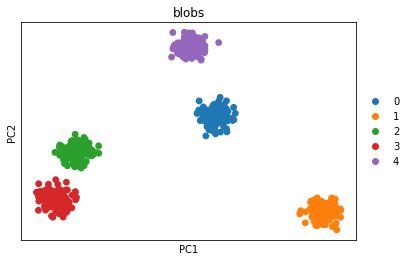

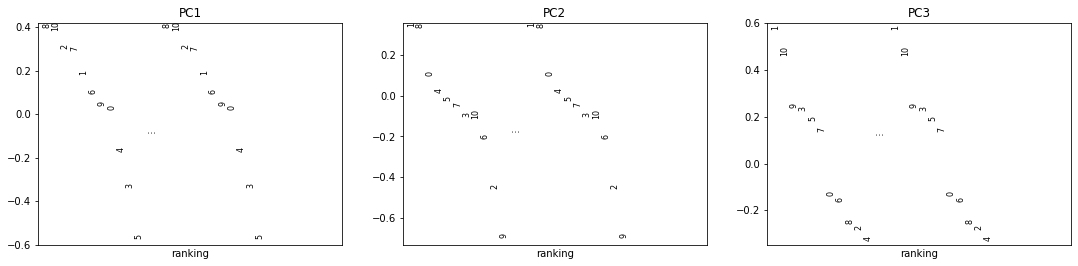

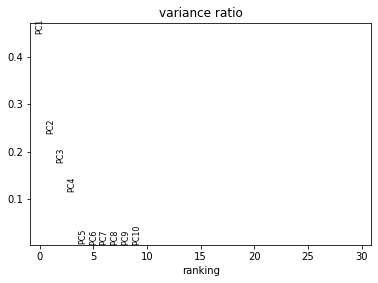

In [23]:
sc.pp.pca(adata)
sc.pl.pca_overview(adata, color="blobs")

In [44]:
def random_shuffle(adata, n, groupby):
    from random import shuffle
    
    df = pd.DataFrame(adata.X)
    groups = list(adata.obs[groupby])
    
    mean_dfs = list()
 
    for i in range(n):
        shuffle(groups)
        df[groupby] = groups
        mean_df = df.groupby(by=groupby).mean()
        mean_dfs.append(mean_df)

    
    return mean_dfs



In [45]:
mean_dfs = random_shuffle(adata, 100, "blobs")

In [71]:
mean_df = mean_dfs[0]
std_df = mean_dfs[0]

values_df = mean_dfs[0].copy()

for i in range(mean_dfs[0].shape[0]):
    for j in range(mean_dfs[0].shape[1]):
        values = list()
        for df in range(len(mean_dfs)):
            values.append(mean_dfs[df].iloc[i,j])
        values_df.iloc[i,j] = str(values)
            


In [86]:
np.mean(eval(values_df.iloc[1,0]))

1.0877867704000002

In [87]:
np.std(eval(values_df.iloc[1,0]))

0.15687419356512425

In [75]:

mean = cn.genecall.meanExpression(blobs, groupby="blobs", return_df=True).T
mean

,0,1,2,3,4,5,6,7,8,9,10
blobs,,,,,,,,,,,
0,2.906172,102.966835,9.627051,2.774141,-0.635718,24.359325,-0.574417,3947.713135,17179.095703,-0.826031,519.768738
1,1.974204,5.549927,8023.816406,-0.999708,-0.999564,-0.999901,1292.291626,433.929657,2454.636719,23974.320312,629.828613
2,-0.230695,443.167053,-0.999121,28.427296,-0.998619,12942.352539,1.349993,-0.750881,-0.986210,362.669983,-0.403198
3,5.030340,-0.999899,19.430107,13.065667,19.836626,12029.165039,55.164532,-0.873376,-0.512349,89.775002,-0.999765
4,48.534916,47.688457,-0.994759,-0.998999,-0.959442,-0.864284,6.030488,-0.595277,25614.656250,-0.999542,-0.994306


In [ ]:
def calculate_significance(data, mean, std):
    

In [19]:
import numpy as np

In [20]:
import scipy as sp
sp.stats.ttest_1samp()

In [85]:

sp.stats.ttest_1samp(eval(values_df.iloc[1,0]), 1.974204)

Ttest_1sampResult(statistic=-56.22173969109293, pvalue=6.166287865569221e-77)

In [ ]:
for i in range(n):
    shuffle(groups)
    df[groupby] = groups
    mean_df = df.groupby(by=groupby).mean()
    mean_dfs.append(mean_df)